In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [17]:
data = load_breast_cancer()

In [18]:
x = data.data
t = data.target[:, None]

print(x.shape)
print(t.shape)

(569, 30)
(569, 1)


In [19]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(381, 30)
(188, 30)
(381, 1)
(188, 1)


In [20]:
# Estandarizar los datos
media = x_train.mean(axis=0, keepdims=True)
std = x_train.std(axis=0, keepdims=True)

x_train = (x_train - media) / std
x_test = (x_test - media) / std # Se estandariza con la media y std de training

Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad reduciendo la dimensión de un problema mediante un método lineal.

Primero podemos analizar la información que se pierde al transformar el conjunto de datos a un espacio de menor dimensión. Para ello creamos un PCA y analizamos su ratio de varianza explicada.

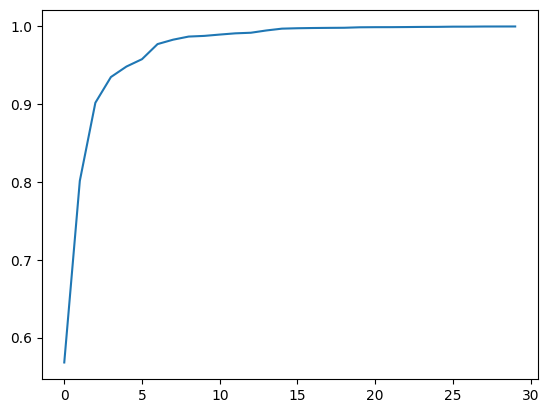

In [21]:
pca = PCA()
pca.fit(x_train)
plt.plot(1 - pca.explained_variance_ratio_)
plt.show()

Se ajusta la transformación indicando el número de dimensiones a la que queremos reducir. Usamos el parámetro n_components.

In [22]:
pca = PCA(n_components=10)
pca.fit(x_train)
print(1 - pca.explained_variance_ratio_[-1]) # Con 10 dimensiones tenemos un 98.78% de la información

0.9878849046501088


Transformamos los datos de training y test a las 10 dimensiones.

In [23]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

x_train_pca.shape

(381, 10)